In [5]:
from __future__ import unicode_literals, print_function, division
import torch
import matplotlib.pyplot as plt
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
from utils.metrics import *

In [8]:
colors = ["k", "tab:orange", "tab:blue", "tab:red", "tab:green", "tab:purple", "tab:brown"]
title = ["Target", "MGxTransformer", "TF-net", "ConvFFN",  "ConvLSTM", "FNO2D",  "Multigrid"]#"U_con",
markers = ['o',  "H", 'v', "*", "X", "d", "P"]

In [9]:
convFFN = torch.load("demo/convFNN.pt")
convLSTM = torch.load("demo/ConvLSTM.pt")
FNO2d = torch.load("demo/FNO2D.pt")
MGTR = torch.load("demo/MGxTransformer_rbc_data_16_4.pt")
TFnet = torch.load("demo/TF_Net.pt")
gt = torch.load("demo/ground_truth.pt")
MgMem = torch.load("demo/Multigrid_rbc_data_16_4.pt")

In [10]:
mse_losses = {
    'ConvFFN': [],
    'ConvLSTM': [],
    'FNO2D': [],
    'MGxTransformer': [],
    'TF-net': [],
    "Multigrid": []
}

MSELoss = torch.nn.MSELoss()
idx = list(range(0, 100, 8))

for i in range(16, 116, 8):
    mse_losses["ConvFFN"].append(MSELoss(convFFN[i], gt[i]))
    mse_losses["ConvLSTM"].append(MSELoss(convLSTM[i], gt[i]))
    mse_losses["FNO2D"].append(MSELoss(FNO2d[i], gt[i]))
    mse_losses["MGxTransformer"].append(MSELoss(MGTR[i], gt[i]))
    mse_losses["TF-net"].append(MSELoss(TFnet[i], gt[i]))
    mse_losses["Multigrid"].append(MSELoss(MgMem[i], gt[i]))

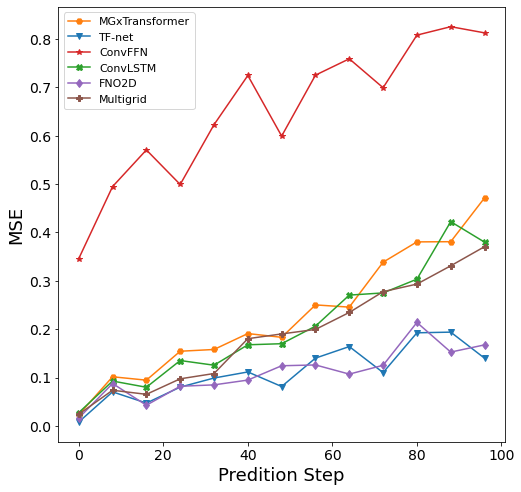

In [11]:
fig = plt.figure(figsize=(8, 8))

for color, model_name, marker in zip(colors[1:], title[1:], markers[1:]):
    plt.plot(idx, mse_losses[model_name], label = model_name, marker = marker, linewidth = 1.5, color = color)

plt.ylabel("MSE", size = 18)
plt.xlabel("Predition Step", size = 18)
plt.legend(fontsize = 11)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.savefig("rmse_horizon.png", dpi = 400, bbox_inches = 'tight')
plt.show()

In [16]:
metric = DivergenceLoss(torch.nn.MSELoss())
div_losses = {
    'ConvFFN': [],
    'ConvLSTM': [],
    'FNO2D': [],
    'MGxTransformer': [],
    'TF-net': [],
    'Multigrid': []
}
idx = list(range(0, 100, 8))

for i in range(16, 116, 8):
    div_losses["ConvFFN"].append(metric(convFFN[i].unsqueeze(0)))
    div_losses["ConvLSTM"].append(metric(convLSTM[i].unsqueeze(0)))
    div_losses["FNO2D"].append(metric(FNO2d[i].unsqueeze(0)))
    div_losses["MGxTransformer"].append(metric(MGTR[i].unsqueeze(0)))
    div_losses["TF-net"].append(metric(TFnet[i].unsqueeze(0)))
    div_losses["Multigrid"].append(metric(MgMem[i].unsqueeze(0)))

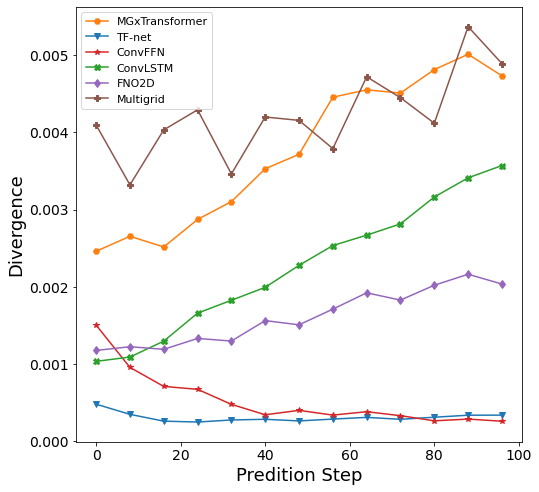

In [17]:
fig = plt.figure(figsize=(8, 8))

for color, model_name, marker in zip(colors[1:], title[1:], markers[1:]):
    plt.plot(idx, div_losses[model_name], label = model_name, marker = marker, linewidth = 1.5, color = color)

plt.ylabel("Divergence", size = 18)
plt.xlabel("Predition Step", size = 18)
plt.legend(fontsize = 11)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.savefig("rmse_horizon.png", dpi = 400, bbox_inches = 'tight')
plt.show()